# Computer Vision - P1

### **Carefully read the following instructions before start coding.**

==============================================================================================
## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments and answers need to be in **English**.

- The deliverable must be a file named **P1_Student1_Student2.zip** that includes:
    - The notebook P1_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Campus Virtual): October, 8, 2024 23:00 h**

==============================================================================================

## Practicum 1: Basics on Image Processing and Manipulation
==============================================================================================

The main topics are:

1. Image loading, saving and creation

2. Color manipulation

In order to complete this practicum, we will work with the following concepts: image creation, data types, image manipulation.

==============================================================================================
### Packages loading

First we need to import the required Python packages for basic image manipulation.

Run the following code:

In [5]:
import numpy as np # useful for manipulating matrices
from skimage import io,img_as_ubyte # useful for image loading and saving
from matplotlib import pyplot as plt # useful for plotting images on iPython or Jupyter Notebooks

Note that commands starting with the percentage sign (`%`) are special internal commands to ipython (as opposed to Python code to be run). In the case below, we set the matplotlib environment to display images results inline (i.e. the images will be shown **inside the
notebook**):

In [7]:
%matplotlib inline

==============================================================================================

### 1.1 Image creation

Remember that [Numpy](https://docs.scipy.org/doc/numpy-1.13.0/reference/) allows us to define images of different kinds treating them as matrices.

The most common examples are:

* Binary: with values of 0 or 1, interpreted as black or white, respectively.
* Grayscale: with possible data types uint8, uint16, double, whose pixel values define their intensity.
* RGB Image: color images consisting of 3 matrices (usually called 'channels'), which contain intensity values for each color separately R (red), G (green) and B (blue).


a) Create and display a grayscale image that has 100 rows and 100 columns where each value should be of type unsigned integer with 8 bits.

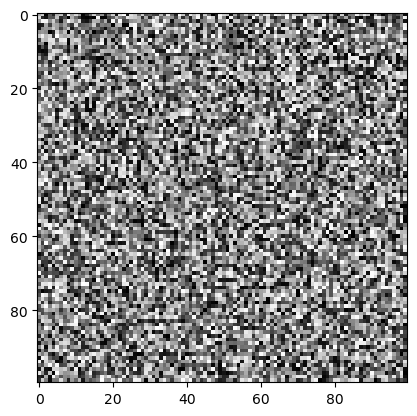

In [148]:
# Generate a random 100x100 grayscale image with pixel values ranging from 0 to 255
image = np.random.randint(0, 255, (100, 100), dtype=np.uint8)  # uint8 = Unsigned integer (0 to 255)

# Display the generated image using a grayscale colormap
plt.imshow(image, cmap='gray')

How many different values can each pixel have in this case?

In [13]:
# From 0 to 255, it is using the data type uint8.
# Each pixel can have 256 possible values.

b) Create and display a **RGB image** that has 100 rows and 100 columns where each value should be of type unsigned integer with 8 bits. Then, transform it to grayscale.:

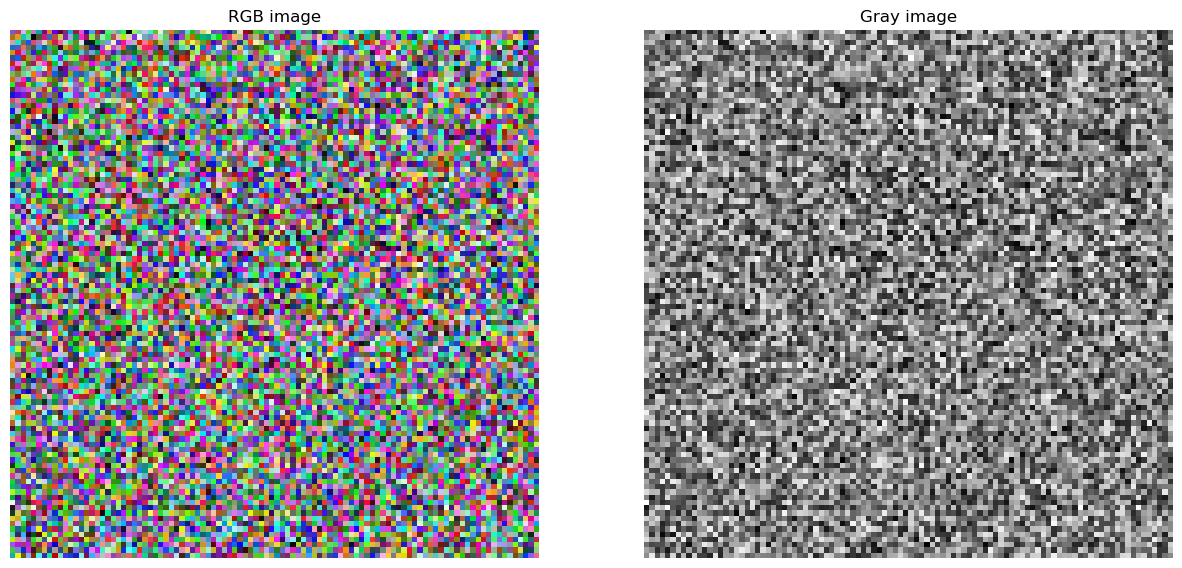

In [150]:
from skimage.color import rgb2gray 

# Create a figure with two subplots side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

# Generate a random 100x100 RGB image with pixel values ranging from 0 to 255
image2 = np.random.randint(0, 255, (100, 100, 3), dtype=np.uint8)

# Plot the RGB image in the first subplot
ax = axs[0]
ax.imshow(image2)  # Display the RGB image
ax.axis('off')  # Hide the axis
ax.set_title('RGB image')  # Set the title for the RGB image

# Convert the RGB image to grayscale
image2_gray = rgb2gray(image2)

# Plot the grayscale image in the second subplot
ax = axs[1]
ax.imshow(image2_gray, cmap='gray')  # Display the grayscale image using a grayscale colormap
ax.set_title('Gray image')  # Set the title for the grayscale image
ax.axis('off')  # Hide the axis

# Display the plots
plt.show()


c) Change the color of the pixels of the image in section **a)** in such a way that you produce the following image. You must use a plot with three subplots.

![./images_notebook/gray_grid.png](./images_notebook/gray_grid.png)

Visualize the image and print the values of its first row.

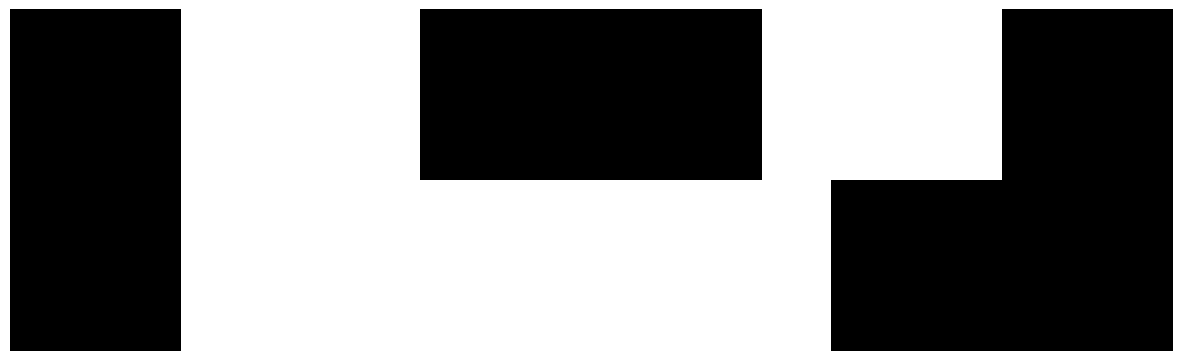

In [152]:
# Create a figure with three subplots in a single row
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
height, width = image.shape  # Get the height and width of the image

# Create image_a by modifying the left half to be black (0) and the right half to be white (1)
image_a = image.copy()
image_a[:, :width // 2] = 0  # Set the left half to black
image_a[:, width // 2:] = 1   # Set the right half to white
ax = axs[0]
ax.imshow(image_a, cmap='gray')  # Display image_a in the first subplot
ax.axis('off')  # Hide the axis

# Create image_b by modifying the top half to be black (0) and the bottom half to be white (1)
image_b = image.copy()
image_b[:height // 2, :] = 0  # Set the top half to black
image_b[height // 2:, :] = 1   # Set the bottom half to white
ax = axs[1]
ax.imshow(image_b, cmap='gray')  # Display image_b in the second subplot
ax.axis('off')  # Hide the axis

# Create image_c by modifying the top-left quadrant to be white (1) and the rest to be black (0)
image_c = image.copy()
image_c[:, :] = 0  # Set the entire image to black
image_c[:height // 2, :width // 2] = 1  # Set the top-left quadrant to white
ax = axs[2]
ax.imshow(image_c, cmap='gray')  # Display image_c in the third subplot
ax.axis('off')  # Hide the axis

# Display the plots
plt.show()

d) Flip the third image to create a mirror ilusion. Show the resulting image while preseving the axis.

![./images_notebook/mirror.png](./images_notebook/mirror.png)

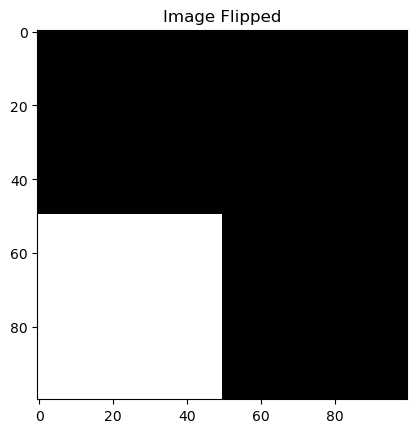

In [19]:
# Flip the image vertically by reversing the order of the rows
flipped_image = image_c[::-1, :]

# Set the title for the plot
plt.title('Image Flipped')

# Display the flipped image using a grayscale colormap
plt.imshow(flipped_image, cmap='gray')

e) Use the above three images (from 1.c) to create the following image

![./images_notebook/color_grid.png](./images_notebook/color_grid.png)

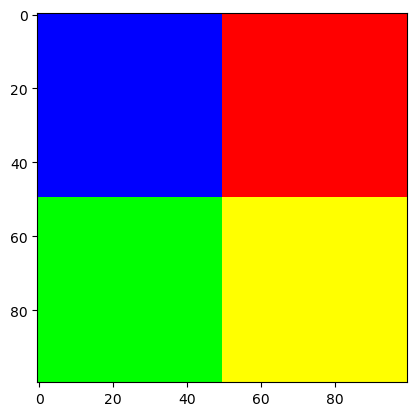

In [154]:
# Define color values for red, blue, green, and yellow
red = [255, 0, 0]     
blue = [0, 0, 255]    
green = [0, 255, 0]   
yellow = [255, 255, 0] 

# Create a blank 100x100 RGB image initialized to black
image_combined = np.zeros((100, 100, 3), dtype=np.uint8)

# Set the pixels in image_combined to yellow where image_c is black (0)
image_combined[image_c == 0] = yellow

# Set the pixels in image_combined to green where image_a is black (0)
image_combined[image_a == 0] = green

# Set the pixels in image_combined to red where image_b is black (0)
image_combined[image_b == 0] = red

# Set the pixels in image_combined to blue where image_c is white (1)
image_combined[image_c == 1] = blue

# Display the combined image
plt.imshow(image_combined)


### 1.2 Image saving and loading

a) Use the IO image package to save the previously generated image:

In [23]:
# Save the combined image to the specified file path in JPEG format
io.imsave('images_notebook/combined_image.jpeg', image_combined)

b) Load the saved image and visualize it. Print the dimensions, the value of pixel (10,10) and data type in order to check everything is correct

The dimensions are: (100, 100, 3)
Value of pixel (10, 10) is: [  0   0 254]
The data type is: uint8


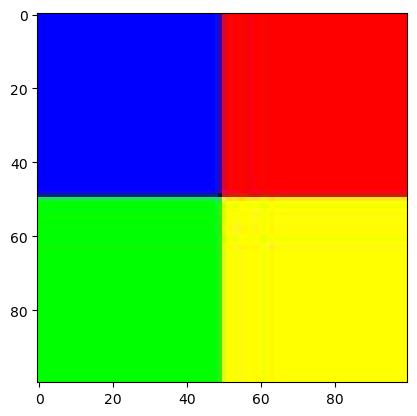

In [158]:
# Read the combined image from the specified file path
img = io.imread('images_notebook/combined_image.jpeg')

# Display the image using matplotlib
plt.imshow(img)

# Print the dimensions of the image (height, width, and number of color channels)
print('The dimensions are:', img.shape) 

# Print the value of the pixel at coordinates (10, 10)
print('Value of pixel (10, 10) is:', img[10, 10])

# Print the data type of the image array (e.g., uint8)
print('The data type is:', img.dtype) 

### 1.3 Color image manipulation

a) Load and show the image `images_notebook/panda.jpg`, and check its dimensions and data type.

**Note:** Pictures may appear in the figure with pseudocolors. What commands to use in order to display them in **RGB** color and in **grayscale**?!

The dimensions are: (800, 1200, 3)
The data type is: uint8


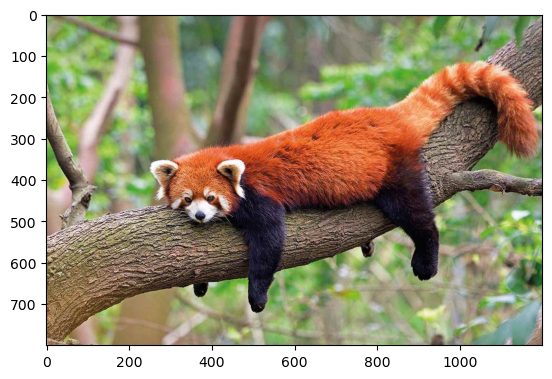

In [156]:
# Read the image from the specified file path
img_1 = io.imread('images_notebook/panda.jpg')

# Print the dimensions of the image (height, width, and number of color channels)
print('The dimensions are:', img_1.shape) 

# Print the data type of the image array (e.g., uint8)
print('The data type is:', img_1.dtype) 

# Display the image using matplotlib
plt.imshow(img_1)


b) Convert the previous image to grayscale, and **save it**.

Moreover, plot the two images (RGB & greyscale) in a single figure, and show details such as shape, dtype, max and min values.

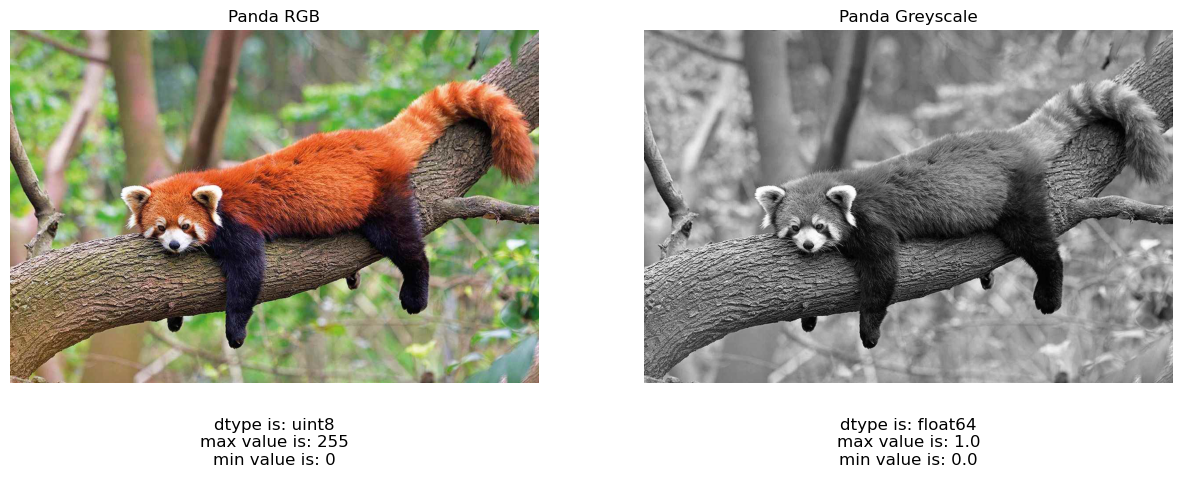

In [146]:
# Convert the RGB image to grayscale
img_1greyscale = rgb2gray(img_1)

# Save the grayscale image as a TIFF file because it's uint64, which can't be saved in other formats without changing dtype
io.imsave('images_notebook/panda_greyscale.tiff', img_1greyscale)

# Create a figure with two subplots side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

# Plot the RGB image in the first subplot
ax = axs[0]
ax.imshow(img_1)
ax.axis('off')  # Hide the axis
ax.set_title('Panda RGB')

# Description of the RGB image
description = [
    'dtype is: ' + str(img_1.dtype),  # Data type of the RGB image
    'max value is: ' + str(img_1.max()),  # Maximum pixel value
    'min value is: ' + str(img_1.min())   # Minimum pixel value
]
y_position = -0.1  # Initial y position for text
for i, text in enumerate(description):
    # Add text annotations to the plot
    ax.text(0.5, y_position - i * 0.05, text, fontsize=12, ha='center', va='top', transform=ax.transAxes)

# Plot the grayscale image in the second subplot
ax = axs[1]
ax.imshow(img_1greyscale, cmap='gray')  # Use grayscale colormap
ax.axis('off')  # Hide the axis
ax.set_title('Panda Greyscale')

# Description of the grayscale image
description = [
    'dtype is: ' + str(img_1greyscale.dtype),  # Data type of the grayscale image
    'max value is: ' + str(img_1greyscale.max()),  # Maximum pixel value
    'min value is: ' + str(img_1greyscale.min())   # Minimum pixel value
]
y_position = -0.1  # Initial y position for text
for i, text in enumerate(description):
    # Add text annotations to the plot
    ax.text(0.5, y_position - i * 0.05, text, fontsize=12, ha='center', va='top', transform=ax.transAxes)

# Display the plots
plt.show()


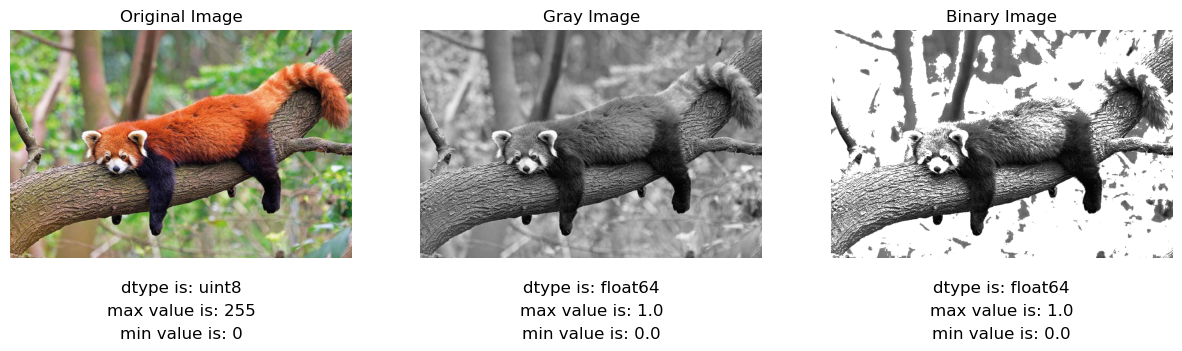

In [33]:
fig, axs = plt.subplots(nrows=1, ncols=3,figsize=(15,15))

ax = axs[0]
ax.imshow(img_1)
ax.axis('off')
ax.set_title('Original Image')
description = [
    'dtype is: ' + str(img_1.dtype),
    'max value is: ' + str(img_1.max()),
    'min value is: ' + str(img_1.min())
]
y_position = -0.1 
for i, text in enumerate(description):
    ax.text(0.5, y_position - i * 0.1, text, fontsize=12, ha='center', va='top', transform=ax.transAxes)

ax = axs[1]
ax.imshow(img_1greyscale, cmap='gray')
ax.axis('off')
ax.set_title('Gray Image')
description = [
    'dtype is: ' + str(img_1greyscale.dtype),
    'max value is: ' + str(img_1greyscale.max()),
    'min value is: ' + str(img_1greyscale.min())
]
y_position = -0.1 
for i, text in enumerate(description):
    ax.text(0.5, y_position - i * 0.1, text, fontsize=12, ha='center', va='top', transform=ax.transAxes)

ax = axs[2]
ax.imshow(image_binary, cmap='gray')
ax.axis('off')
ax.set_title('Binary Image')
description = [
    'dtype is: ' + str(image_binary.dtype),
    'max value is: ' + str(image_binary.max()),
    'min value is: ' + str(image_binary.min())
]
y_position = -0.1 
for i, text in enumerate(description):
    ax.text(0.5, y_position - i * 0.1, text, fontsize=12, ha='center', va='top', transform=ax.transAxes)




c) Compute the mean of the previous grayscale image and use a logical operation to obtain a boolean image. Pixels greather than the mean value must be shown as white. Display the binary image.

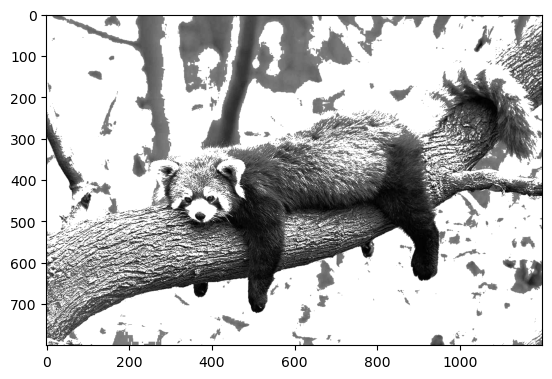

In [31]:
# Calculate the mean value of the grayscale image
mean_grey = np.mean(img_1greyscale)

# Create a binary copy of the grayscale image
image_binary = img_1greyscale.copy()

# Set all pixels greater than the mean value to 1 (white)
image_binary[image_binary > mean_grey] = 1

# Display the binary image using a grayscale colormap
plt.imshow(image_binary, cmap='gray')

d) Visualize in the same figure all the three images: (1) the original image, (2) the gray image, and (3) the binarized image. Set the corresponding titles of the images and their descriptions

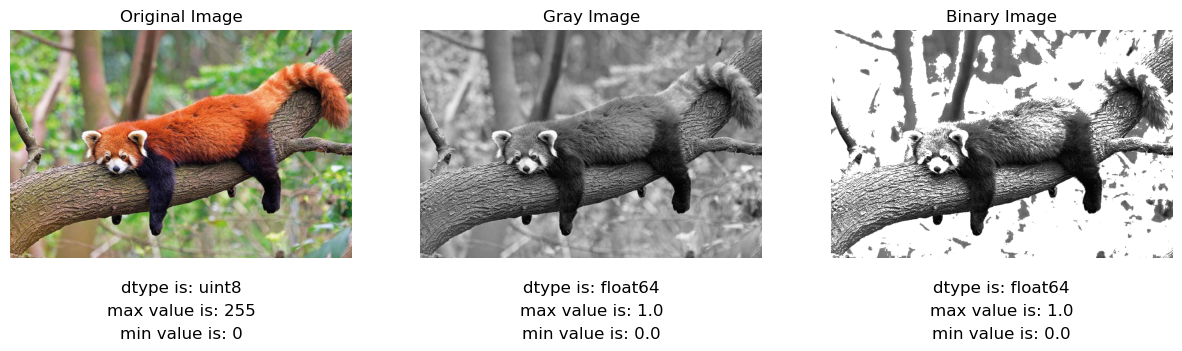

In [144]:
# Set up a subplot with 1 row and 3 columns to display three images
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

# Display the original image
ax = axs[0]
ax.imshow(img_1)  # Show the original image
ax.axis('off')  # Hide the axes for better visual appeal
ax.set_title('Original Image')  # Title for the original image

# Add descriptions for the original image
description = [
    'dtype is: ' + str(img_1.dtype),  # Data type of the image
    'max value is: ' + str(img_1.max()),  # Maximum pixel value
    'min value is: ' + str(img_1.min())   # Minimum pixel value
]
y_position = -0.1  # Starting position for the text
for i, text in enumerate(description):
    ax.text(0.5, y_position - i * 0.1, text, fontsize=12, ha='center', va='top', transform=ax.transAxes)

# Display the grayscale image
ax = axs[1]
ax.imshow(img_1greyscale, cmap='gray')  # Show the grayscale image using a gray colormap
ax.axis('off')  # Hide the axes for a cleaner look
ax.set_title('Gray Image')  # Title for the grayscale image

# Add descriptions for the grayscale image
description = [
    'dtype is: ' + str(img_1greyscale.dtype),  # Data type of the grayscale image
    'max value is: ' + str(img_1greyscale.max()),  # Maximum pixel value in grayscale
    'min value is: ' + str(img_1greyscale.min())   # Minimum pixel value in grayscale
]
y_position = -0.1  # Starting position for the text
for i, text in enumerate(description):
    ax.text(0.5, y_position - i * 0.1, text, fontsize=12, ha='center', va='top', transform=ax.transAxes)

# Display the binary image
ax = axs[2]
ax.imshow(image_binary, cmap='gray')  # Show the binary image in gray
ax.axis('off')  # Hide the axes
ax.set_title('Binary Image')  # Title for the binary image

# Add descriptions for the binary image
description = [
    'dtype is: ' + str(image_binary.dtype),  # Data type of the binary image
    'max value is: ' + str(image_binary.max()),  # Maximum pixel value in binary
    'min value is: ' + str(image_binary.min())   # Minimum pixel value in binary
]
y_position = -0.1  # Starting position for the text
for i, text in enumerate(description):
    ax.text(0.5, y_position - i * 0.1, text, fontsize=12, ha='center', va='top', transform=ax.transAxes)

# Show the plot with all three images
plt.show()


### 1.4 Images manipulation

a) Create an RGB black image, 15% larger than the panda image. Afterwards, embed the dog image in the center. Show the framed image.

**Note:** Be carefull with the number of channels.

**Note:** Print the original image shape and the new image size to check if the sizes of the second one are 15% larger then the first one.


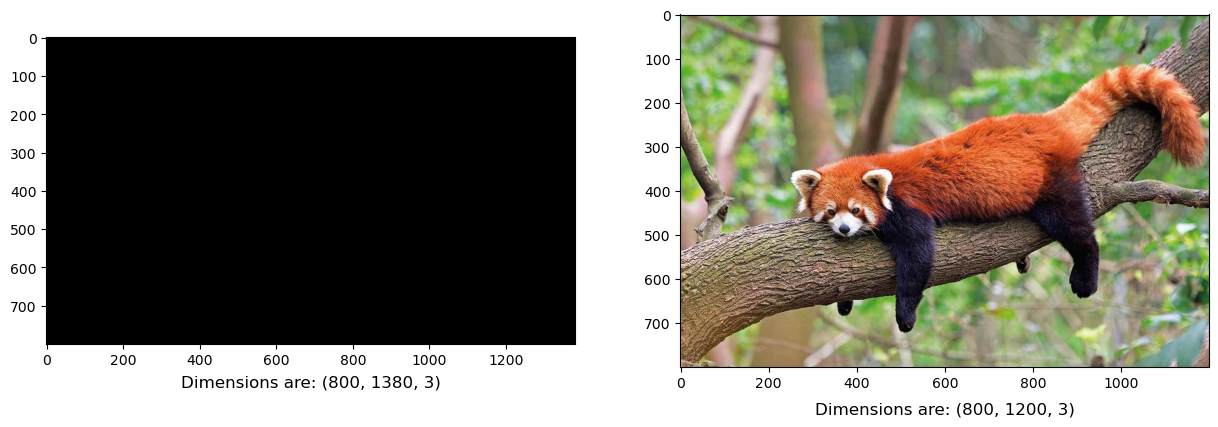

In [136]:
# Read the panda image and get its dimensions
img_panda = io.imread('images_notebook/panda.jpg')
height, width, asd = img_panda.shape

# Calculate new width by increasing the original width by 15%
new_width = int(width + (width * 0.15))

# Create a new image with the increased width, initialized to zeros (black)
img_larger = np.zeros((height, new_width, 3))

# Set up a subplot to display both images
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

# Display the larger empty image
ax = axs[0]
ax.imshow(img_larger)
description = [
    'Dimensions are: ' + str(img_larger.shape),  # Show dimensions of the larger image
]
y_position = -0.1 
for i, text in enumerate(description):
    ax.text(0.5, y_position - i * 0.1, text, fontsize=12, ha='center', va='top', transform=ax.transAxes)

# Display the original panda image
ax = axs[1]
ax.imshow(img_panda)
description = [
    'Dimensions are: ' + str(img_panda.shape),  # Show dimensions of the original image
]
y_position = -0.1 
for i, text in enumerate(description):
    ax.text(0.5, y_position - i * 0.1, text, fontsize=12, ha='center', va='top', transform=ax.transAxes)

# Get dimensions of the larger image for framing
height_large, width_large, asd_large = img_larger.shape
difference_width = int(width_large - width) // 2  # Calculate width difference for centering

# Create a frame image and copy the panda image into the center
frame_image = img_larger.copy()
frame_image[:, difference_width:width_large - difference_width] = img_panda  # Center the panda image
  


b) Change the frame of the new image to green. Visualize the three images: original, black frame and green frame, in one single figure, with their respective titles.

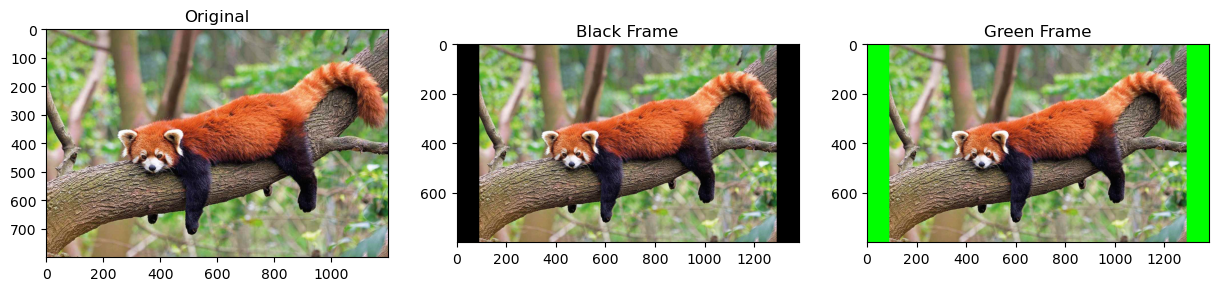

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure the frame image is of type uint8 for proper visualization
frame_image = frame_image.astype(np.uint8)

# Create a copy of the original frame for modification
frame_green = frame_image.copy()

# Create a mask for the right section of the image based on the specified width
mask = frame_image[:, width_large-difference_width:]

# Assign green color to the specified sections (left and right) of the frame
frame_green[:, width_large-difference_width:] = [0, 255, 0]  # Right section
frame_green[:, :difference_width] = [0, 255, 0]  # Left section

# Ensure frame_green pixel values are clipped within the range [0, 255]
frame_green = np.clip(frame_green, 0, 255).astype(np.uint8)

# Create a figure to display the original and modified images
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

# Display the original image
ax = axs[0]
ax.imshow(img_panda)
ax.set_title('Original')

# Display the black frame image
ax = axs[1]
ax.imshow(frame_image)
ax.set_title('Black Frame')

# Display the green frame image
ax = axs[2]
ax.imshow(frame_green)
ax.set_title('Green Frame')

# Show the figure with all three images
plt.show()

### 1.5 Contrast enhancement

a) In some domains like medical imaging, it is common to have images with low contrast. Open the image `images_notebook/cell_lowcontrast.jpg` and visualize it without graylevel enhancement. Print the image size, data type, minimum and maximum of the image.

**Note:** When running the function `imshow()` the image is authomatically enhanced. Use the `vmin` and `vmax` parameters in order to deactivate the enhancement applied by default. To this purpose, check the data type and used the maximum and minimum value corresponding to this type.


dtype is:  uint8
Maximum value is:  255
Minimum value is:  80


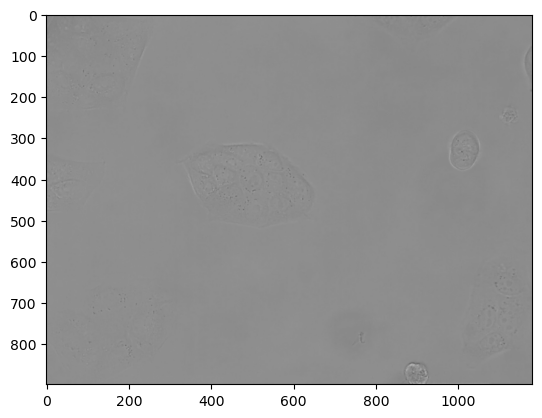

In [130]:
# Load a low-contrast image for analysis
image_lowcontrast = io.imread('images_notebook/cell_lowcontrast.png')

# Print the data type of the image array to understand the pixel format
print('dtype is: ', image_lowcontrast.dtype)

# Display the maximum pixel value to assess brightness
print('Maximum value is: ', image_lowcontrast.max())

# Display the minimum pixel value to assess darkness
print('Minimum value is: ', image_lowcontrast.min())

# Visualize the low-contrast image, scaling its display range to min and max values
plt.imshow(image_lowcontrast, vmin=str(image_lowcontrast.min()), vmax=str(image_lowcontrast.max()))
plt.show()  # Render the image plot


b) Create an image called `dark_image` using the  values from the original one. Compute the minimum value of the image and substract this value of the original image. Print the new maximum a minimum values. Show the new image without graylevel enhancement.

dtype is :  175
dtype is :  0


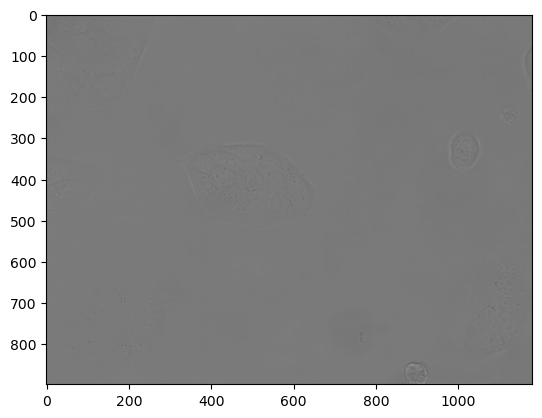

In [41]:
# Create a copy of the low-contrast image for darkening manipulation
dark_image = image_lowcontrast.copy() 

# Get the minimum pixel value to adjust the image
minimum_value = dark_image.min()

# Subtract the minimum value to shift the pixel values, enhancing darkness
dark_image = dark_image - minimum_value

# Print the maximum and minimum pixel values to check the adjustment
print('Maximum value is: ', dark_image.max())
print('Minimum value is: ', dark_image.min())

# Display the darkened image with its min and max values for reference
plt.imshow(dark_image, vmin=str(dark_image.min()), vmax=str(dark_image.max()))
plt.show()  # Render the image plot


c) Similarly to the previous question, create a new image called `bright_im` from the original one, so that the maximal value of the new image is 255. Check the minimal and maximal values of the new image, and show the new image without graylevel enhancement.


Maxium value is :  255
Minium is :  80


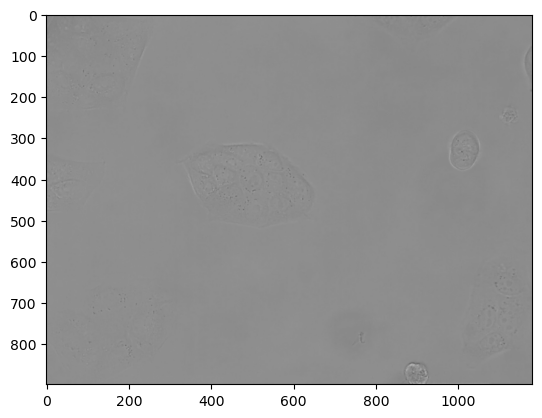

In [43]:
# Create a copy of the low-contrast image for brightness manipulation
bright_im = image_lowcontrast.copy()

# Print the maximum and minimum pixel values to understand the image's contrast
print('Maximum value is: ', bright_im.max())
print('Minimum value is: ', bright_im.min())

# Display the brightened image with its min and max values for reference
plt.imshow(bright_im, vmin=str(bright_im.min()), vmax=str(bright_im.max())) 
plt.show()  # Render the image plot


d) Apply contrast enhancement to the original image. There are two ways for it: (1) by direct manipulation, and (2) through scikit-image command [rescale_intensity](https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.rescale_intensity). Check the minimal and maximal values of the enhanced image, and compare them with the previous one. Show the two images  without graylevel enhancement.

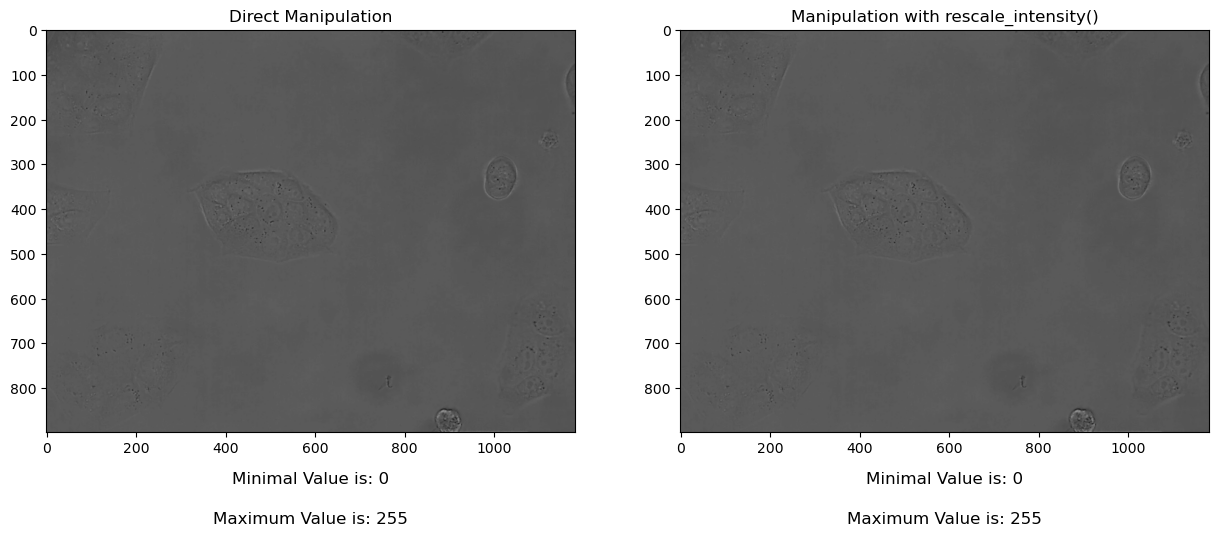

In [126]:
from skimage.exposure import rescale_intensity

# Set up a 1x2 subplot for comparing direct manipulation and rescaling intensity
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

# APPLY DIRECT MANIPULATION ON THE ORIGINAL IMAGE
direct_mani = image_lowcontrast.copy()

# Get minimum and maximum pixel values for normalization
min_val = image_lowcontrast.min()
max_val = image_lowcontrast.max()

# Shift pixel values to start from 0 (darkest becomes 0)
direct_mani = direct_mani - min_val 
# Normalize values between [0, 1]
direct_mani = direct_mani / (max_val - min_val) 
# Scale to [0, 255] range for display
direct_mani = direct_mani * 255 
# Convert to uint8 for correct visualization
direct_mani = direct_mani.astype(np.uint8)  

# APPLY MANIPULATION USING rescale_intensity FUNCTION
rescale_mani = rescale_intensity(image_lowcontrast, in_range=(min_val, max_val), out_range=(0, 255))
# Convert to uint8 for correct visualization
rescale_mani = rescale_mani.astype(np.uint8)  

# Display the image with direct manipulation and its min/max values
ax = axs[0]
ax.imshow(direct_mani, vmin=str(direct_mani.min()), vmax=str(direct_mani.max()))
ax.set_title('Direct Manipulation')
description = [
    'Minimal Value is: ' + str(direct_mani.min()),  # Display min value
    'Maximum Value is: ' + str(direct_mani.max())   # Display max value
]
y_position = -0.1 
for i, text in enumerate(description):
    ax.text(0.5, y_position - i * 0.1, text, fontsize=12, ha='center', va='top', transform=ax.transAxes)

# Display the image with rescale_intensity manipulation and its min/max values
ax = axs[1]
ax.imshow(rescale_mani, vmin=str(rescale_mani.min()), vmax=str(rescale_mani.max()))
ax.set_title('Manipulation with rescale_intensity()')
description = [
    'Minimal Value is: ' + str(rescale_mani.min()),  # Display min value
    'Maximum Value is: ' + str(rescale_mani.max())   # Display max value
]
y_position = -0.1 
for i, text in enumerate(description):
    ax.text(0.5, y_position - i * 0.1, text, fontsize=12, ha='center', va='top', transform=ax.transAxes)

# Show the plots to visualize the results
plt.show()


e) Visualize the 5 images in the same figure, each one with its corresponding title.

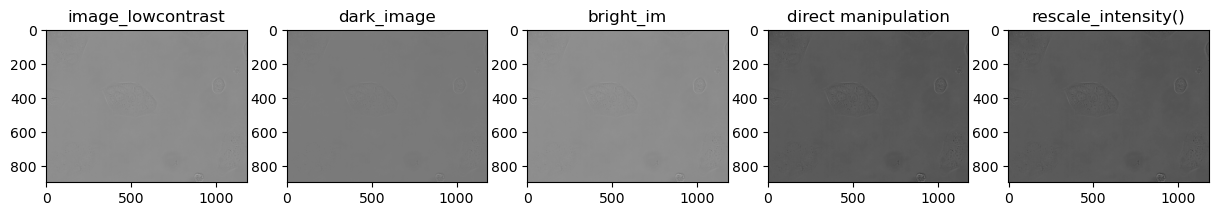

In [122]:
# Set up a 1x5 subplot to compare various image manipulations
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))

# Display the low-contrast image
ax = axs[0]
ax.imshow(image_lowcontrast, vmin=str(image_lowcontrast.min()), vmax=str(image_lowcontrast.max()))  
ax.set_title('image_lowcontrast')  # Shows limited contrast, making details harder to see

# Display the dark image
ax = axs[1]
ax.imshow(dark_image, vmin=str(dark_image.min()), vmax=str(dark_image.max()))
ax.set_title('dark_image')  # A darker image, likely losing some detail in shadows

# Display the bright image
ax = axs[2]
ax.imshow(bright_im, vmin=str(bright_im.min()), vmax=str(bright_im.max()))
ax.set_title('bright_im')  # Brightened image, which may lose detail in highlights

# Display the image with direct manipulation
ax = axs[3]
ax.imshow(direct_mani, vmin=str(direct_mani.min()), vmax=str(direct_mani.max()))
ax.set_title('direct manipulation')  # Direct editing approach, can yield varied results

# Display the image processed with rescale_intensity
ax = axs[4]
ax.imshow(rescale_mani, vmin=str(rescale_mani.min()), vmax=str(rescale_mani.max()))
ax.set_title('rescale_intensity()')  # Rescaling adjusts intensity across the full range, enhancing contrast

# Render the plots to visualize the differences
plt.show()

### 1.6 Color manipulation

a) Read and visualize the image `images_notebook/barcelona.jpg` (see figure top). Extract its three channels and visualize them in the same figure with their respective titles (see the figure bottom).
<img src="images_notebook/barcelona.jpg">

<img src="images_notebook/barcelona_channels.png">

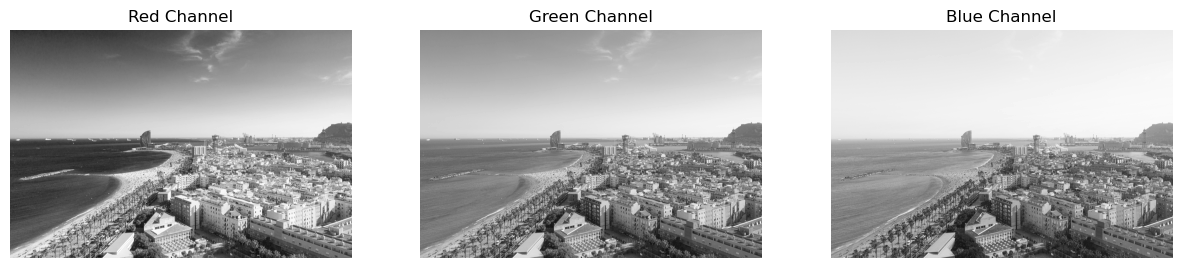

In [116]:
# Load the image of Barcelona
image_barcelona = io.imread('images_notebook/barcelona.jpg')

# Set up a 1x3 subplot to display the RGB channels separately
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

# Display the red channel in grayscale
ax = axs[0]
ax.axis('off')  # Turn off axis for better visual appeal
ax.imshow(image_barcelona[:, :, 0], cmap='gray')  # Isolating the red channel highlights its contribution to the image
ax.set_title('Red Channel')

# Display the green channel in grayscale
ax = axs[1]
ax.imshow(image_barcelona[:, :, 1], cmap='gray')
ax.axis('off')
ax.set_title('Green Channel')

# Display the blue channel in grayscale
ax = axs[2]
ax.axis('off')
ax.imshow(image_barcelona[:, :, 2], cmap='gray')  # Shows the blue channel, often crucial for depth perception
ax.set_title('Blue Channel')

# Render the plot to visualize the separate RGB channels
plt.show()


d) Read and visualize the image images_notebook/chairs.jpg.
Interchange the red and blue channels and show the original and resulting image side by side with their respective titles.

Text(0.5, 1.0, 'Interchange Image')

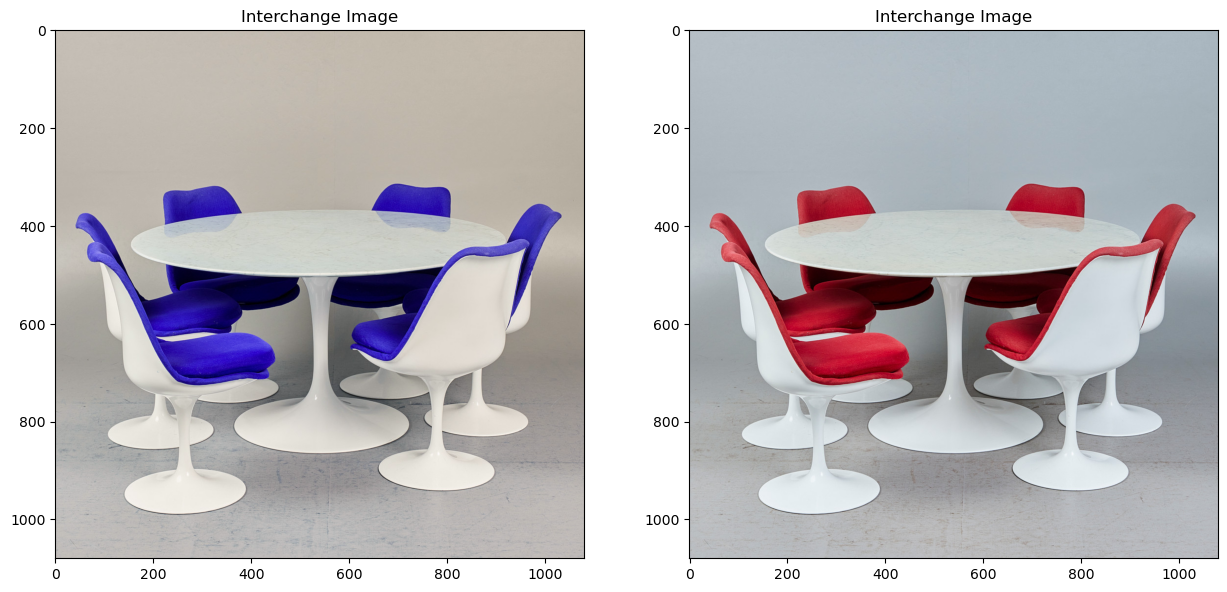

In [51]:
# Load the image of chairs
image_chair = io.imread('images_notebook/chairs.jpg')

# Create a 1x2 subplot to compare images
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))

# Create a copy of the image with RGB channels interchanged (BGR to RGB)
image_chair_copy = image_chair[:, :, [2, 1, 0]]  # This can highlight color distortions or variations

# Display the interchanged image
ax = axs[0]
ax.imshow(image_chair_copy)
ax.set_title('Interchanged Colors')

# Display the original image for comparison
ax = axs[1]
ax.imshow(image_chair)
ax.set_title('Original Image')

# Render the plot
plt.show()

### 1.7 Masks and logical image manipulation

a) Read the image `images_notebook/circles.bmp` (see figure top) and define 3 images in such a way that each one contains only 1 ball (see figure bottom). Visualize the 3 images in the same figure, each one with its corresponding title.

<img src="images_notebook/ex16.png">

**Note:** Be careful when applying `imshow` since it automatically increases the contrast of the image (putting minimum values to 0 and maximal to 1).

**Note:** Be careful when applying type conversion. Check the ranges of the image values.

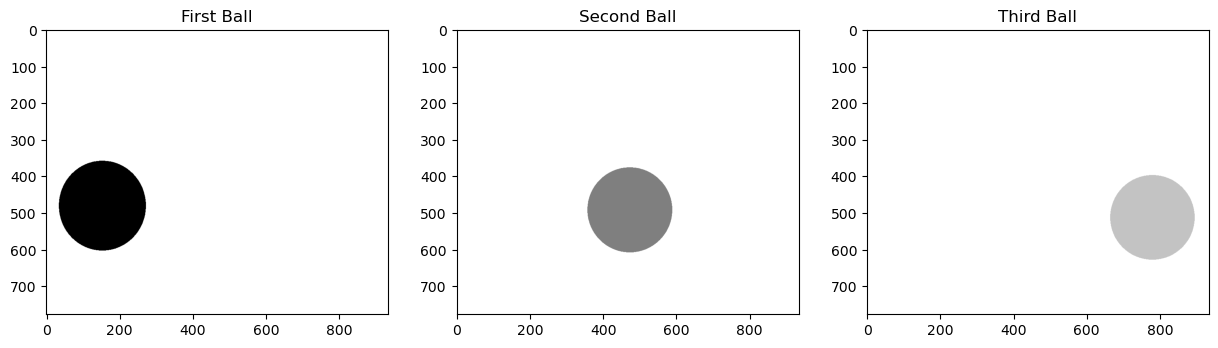

In [114]:
# Load the image and convert to grayscale
img_balls = io.imread('images_notebook/circles.bmp')
img_balls = rgb2gray(img_balls)

# Get image dimensions
height, width = img_balls.shape

# Initialize arrays for each ball
img_ball_a = np.ones((height, width))
img_ball_b = np.ones((height, width))
img_ball_c = np.ones((height, width))

# Create 1x3 subplot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

# Mask for the first ball: minimum pixels
mask_a = (img_balls == np.min(img_balls))
img_ball_a[mask_a] = img_balls[mask_a]  # Fill with ball pixels

# Mask for the second ball: not minimum pixels
mask_b = (img_balls != np.min(img_balls))
img_ball_b[mask_b] = img_balls[mask_b]  # Fill with ball pixels

# Mask to replace non-minimum values in img_ball_b with 1
mask_b2 = (img_ball_b != img_ball_b.min())
img_ball_b[mask_b2] = 1  # Set to 1

# Mask for the third ball: not minimum pixels in both img_ball_a and img_ball_b
mask_c = (img_ball_b != np.min(img_ball_b)) & (img_ball_a != np.min(img_ball_a))
img_ball_c[mask_c] = img_balls[mask_c]  # Fill with ball pixels

# Show the first ball
ax = axs[0]
ax.set_title('First Ball')
ax.imshow(img_ball_a, vmin=0, vmax=1, cmap='gray')

# Show the second ball
ax = axs[1]
ax.set_title('Second Ball')
ax.imshow(img_ball_b, vmin=0, vmax=1, cmap='gray')

# Show the third ball
ax = axs[2]
ax.set_title('Third Ball')
ax.imshow(img_ball_c, vmin=0, vmax=1, cmap='gray')

# Render plot
plt.show()


b) Now create a similar plot to the previous one, but this time each of the 3 images must contain two balls.
- The first image must contain the central and right balls.
- The second image must contain the left and right balls.
- The third image must contain the left and central balls.

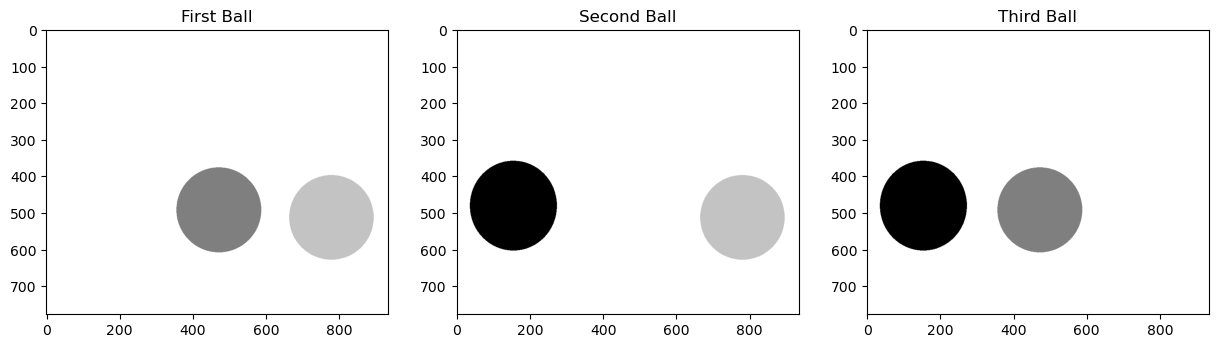

In [112]:
# Create 1x3 subplot
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))

# Mask for the first ball: get non-minimum pixels
mask_1 = (img_balls != np.min(img_balls))
img_ball_1 = np.ones((height, width))  # Init array
img_ball_1[mask_1] = img_balls[mask_1]  # Fill with ball pixels

# Mask for the second ball: min pixels or not in img_ball_1
mask_2 = (img_balls == np.min(img_balls)) | (img_ball_1 != np.min(img_ball_1))
img_ball_2 = np.ones((height, width))  # Init array
img_ball_2[mask_2] = img_balls[mask_2]  # Fill with ball pixels

# Mask for the third ball: not in img_ball_2 or min pixels
mask_3 = (img_balls != img_ball_2) | (img_balls == np.min(img_balls))
img_ball_3 = np.ones((height, width))  # Init array
img_ball_3[mask_3] = img_balls[mask_3]  # Fill with ball pixels

# Show the first ball
ax = axs[0]
ax.set_title('First Ball')
ax.imshow(img_ball_1, vmin=0, vmax=1, cmap='gray')

# Show the second ball
ax = axs[1]
ax.set_title('Second Ball')
ax.imshow(img_ball_2, vmin=0, vmax=1, cmap='gray')

# Show the third ball
ax = axs[2]
ax.set_title('Third Ball')
ax.imshow(img_ball_3, vmin=0, vmax=1, cmap='gray')

# Render plot
plt.show()


c) Given the images `images_notebook/coat.png` and `images_notebook/model.png` (first two images on the figure below), implement the necessary code to construct the image of the model with the coat (third image). Next find in internet an image with a texture and apply it to obtain an image of the jacket with the found texture (fourth image is only an example).

<img src="images_notebook/ex17d.png">

**Note:** when applying [resize, rotate, etc...](https://scikit-image.org/docs/stable/auto_examples/transform/plot_rescale.html) keep track how the image type and values range change. When necessary, apply type conversion using [img_as_float, img_as_uint, img_as_ubyte.](https://scikit-image.org/docs/stable/api/skimage.html)

**Note: DO NOT USE LOOPS to overlap the images!! It will be penalized.**


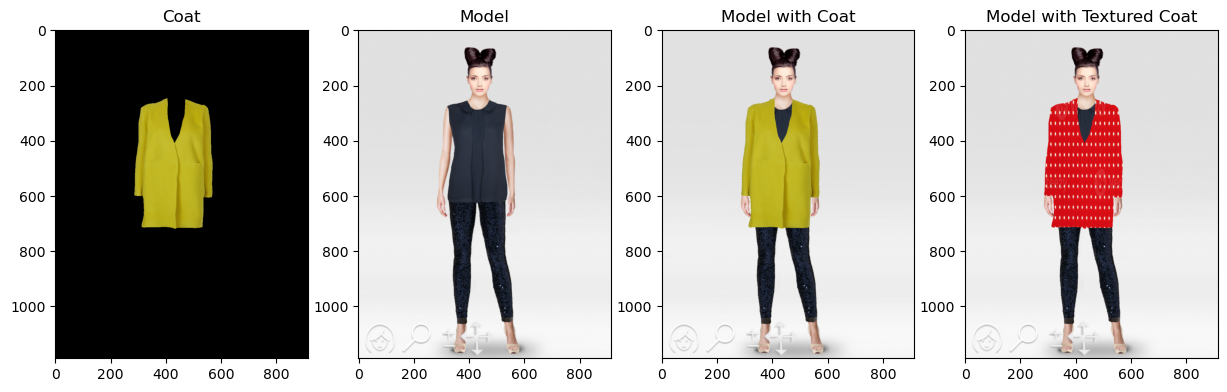

In [108]:

from skimage.transform import resize

# Load images
img_coat = io.imread('images_notebook/coat.png')
img_model = io.imread('images_notebook/model.png')
img_texture = io.imread('images_notebook/texture.jpg')

# Ensure the images are RGB by removing the alpha channel if present (RGBA -> RGB)
if img_coat.shape[2] == 4:  # If the image has 4 channels, remove the last channel (alpha)
    img_coat = img_coat[:, :, :3]
if img_model.shape[2] == 4:
    img_model = img_model[:, :, :3]
if img_texture.shape[2] == 4:
    img_texture = img_texture[:, :, :3]

# Get the height and width of the coat image to resize other images
coat_height, coat_width = img_coat.shape[:2]

# Resize all images to match the size of the coat
img_model_resized = resize(img_model, (coat_height, coat_width), anti_aliasing=True)
img_texture_resized = resize(img_texture, (coat_height, coat_width), anti_aliasing=True)

# Create a mask to detect non-black pixels in the coat image (assuming the background is black)
mask = (img_coat[:, :, 0] != 0)

# Overlay the coat on the model using the mask
model_with_coat = img_model_resized.copy()
img_model[mask] = img_coat[mask]

# Apply the texture to the coat area using the mask
model_with_textured_coat = model_with_coat.copy()
model_with_textured_coat[mask] = img_texture_resized[mask]

# Ensure pixel values are within the valid range [0, 1] before displaying
model_with_coat = np.clip(model_with_coat, 0, 1)
model_with_textured_coat = model_with_textured_coat

# Display the results
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(img_coat)
ax[0].set_title('Coat')
ax[1].imshow(img_model_resized)
ax[1].set_title('Model')
ax[2].imshow(img_model)
ax[2].set_title('Model with Coat')
ax[3].imshow(model_with_textured_coat)
ax[3].set_title('Model with Textured Coat')

# Show the final plot
plt.show()
